# Exploratory Analysis

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
for dirname, _, filenames in os.walk('CT-scan-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

CT-scan-dataset/3d_images.zip.zip
CT-scan-dataset/lung_stats.csv
CT-scan-dataset/2d_masks/ID_0026_Z_0140.tif
CT-scan-dataset/2d_masks/ID_0004_Z_0066.tif
CT-scan-dataset/2d_masks/ID_0017_Z_0061.tif
CT-scan-dataset/2d_masks/ID_0129_Z_0104.tif
CT-scan-dataset/2d_masks/ID_0137_Z_0155.tif
CT-scan-dataset/2d_masks/ID_0227_Z_0181.tif
CT-scan-dataset/2d_masks/ID_0136_Z_0122.tif
CT-scan-dataset/2d_masks/ID_0090_Z_0119.tif
CT-scan-dataset/2d_masks/ID_0214_Z_0120.tif
CT-scan-dataset/2d_masks/ID_0046_Z_0110.tif
CT-scan-dataset/2d_masks/ID_0231_Z_0140.tif
CT-scan-dataset/2d_masks/ID_0198_Z_0120.tif
CT-scan-dataset/2d_masks/ID_0095_Z_0097.tif
CT-scan-dataset/2d_masks/ID_0217_Z_0078.tif
CT-scan-dataset/2d_masks/ID_0063_Z_0067.tif
CT-scan-dataset/2d_masks/ID_0018_Z_0069.tif
CT-scan-dataset/2d_masks/ID_0258_Z_0072.tif
CT-scan-dataset/2d_masks/ID_0066_Z_0141.tif
CT-scan-dataset/2d_masks/ID_0068_Z_0055.tif
CT-scan-dataset/2d_masks/ID_0009_Z_0114.tif
CT-scan-dataset/2d_masks/ID_0265_Z_0063.tif
CT-scan-dat

In [4]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [5]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [13]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [7]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# lung_stats.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('CT-scan-dataset/lung_stats.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'lung_stats.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 267 rows and 7 columns


In [8]:
df1.head(5)

,img_id,lung_area_px,lung_area_mm2,lung_volume_fraction,lung_mean_hu,lung_pd95_hu,lung_pd05_hu
0,ID_0000_Z_0142.tif,57342,40318.593750,0.218742,-644.750671,-368.00,-798.0
1,ID_0001_Z_0146.tif,95955,67468.359375,0.366039,-720.042978,-544.00,-847.0
2,ID_0002_Z_0162.tif,60782,42737.343750,0.231865,-616.722632,-294.00,-777.0
3,ID_0003_Z_0132.tif,52852,37161.562500,0.201614,-664.036441,-267.55,-851.0
4,ID_0004_Z_0066.tif,81260,57135.937500,0.309982,-675.347969,-295.00,-842.0


In [10]:
plotPerColumnDistribution(df1, 10, 5)

<Figure size 2400x512 with 0 Axes>

/tmp/ipykernel_4637/3510424060.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


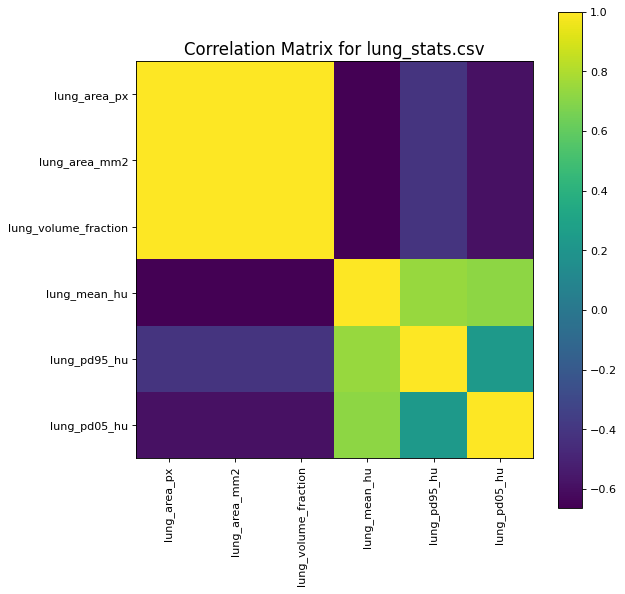

In [11]:
plotCorrelationMatrix(df1, 8)

/tmp/ipykernel_4637/102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


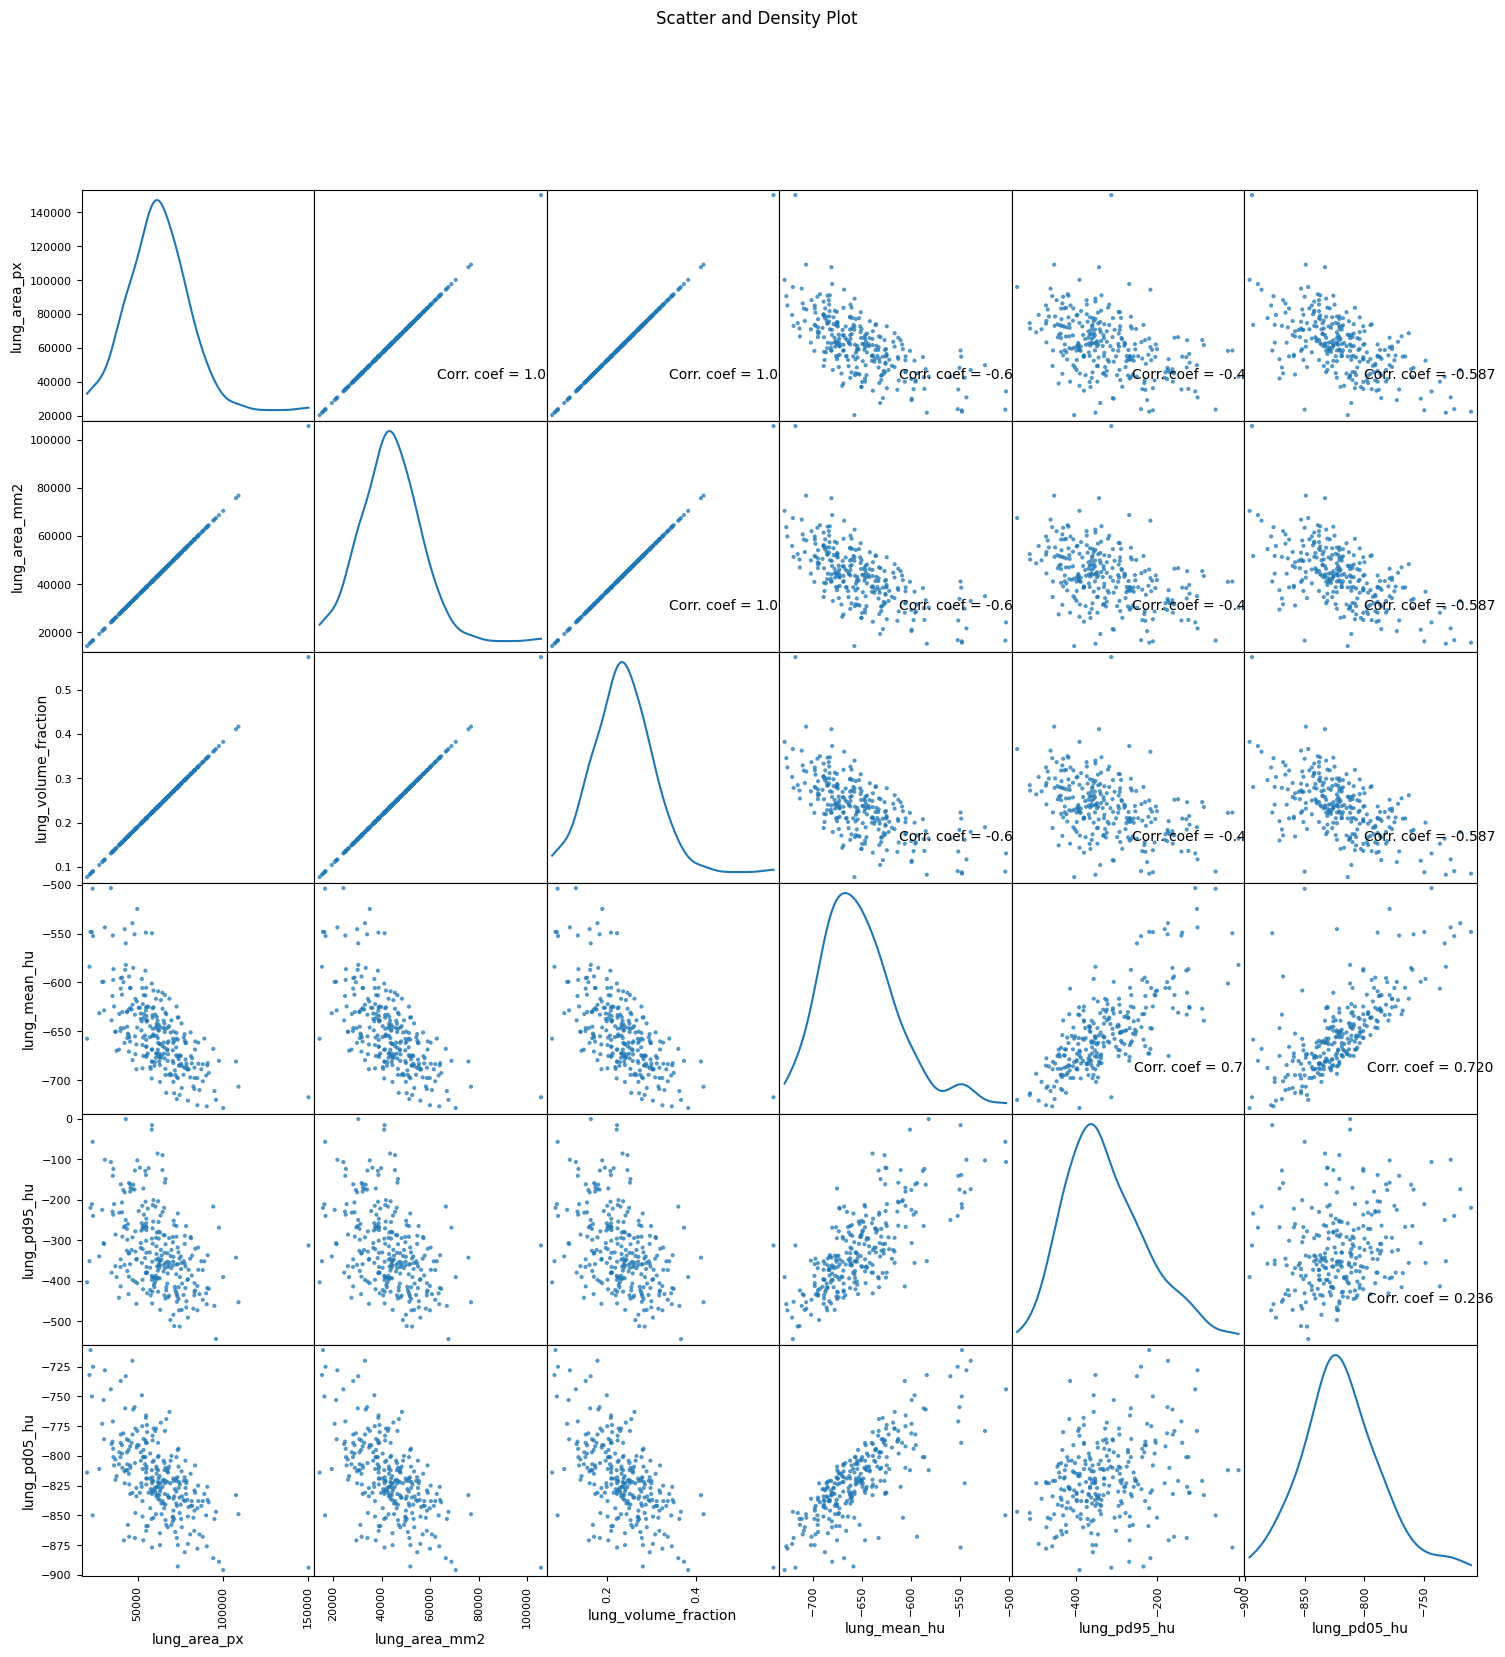

In [14]:
plotScatterMatrix(df1, 18, 10)